#### Hashing

###### Hash function
Si tenemos unos objetos S y un entero m>0, definimos una funcion h: S -> {0,...,m-1} como una funcion de hash. Que encoda a los elementos de S en eneteros menores que m. <br>
h tiene que ser rapido y queremos que de resultados distintos para distintos objetos de S (lo cual es claramente imposible si lo queremos mapear a {0,1, ... ,m-1}) Cuando dos elementos o1, o2 en S son mandados a un mismo punto, decimos que sucedi'o una colisi'on. <br> 

###### Map

Un map de S a V es una estructura de datos con metodos <br>
1) Haskey(O): nos dice si hay una entrada v in V correspondiente a O in S <br> 
2) get(O): nos da el valor en V correspondiente a O <br> 
3) Set(O,v): le asigna el valor v al objeto O. <br>  <br>

###### Chaining:
Si mas de dos objetos son hasheados al mimso numero (una colisi'on), en dicho numero vamos a guardar en realidad una lista con los dos objetos. Ahora dado ese objeto, el hash ya no nos dice exactamente donde est'a, pero nos dice al menos en qu'e lista est'a.


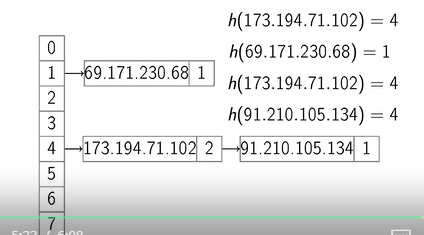

##### Phone book problem

queremos hacer una relacion entre numeros de telefono y nombre de contacto. Para ello hay que encontrar una relacion que a cada numero de telefono le asigne un contacto y que a los contactos les asigne su numero de telefono <br>
<br> 
Direct adressing: Para un numero de telefono 55832392 podemos asignarle una casilla en un array de 10^8 espacios y en dicha casilla poner el nombre de este telefono. El problema obviamente es que vamos a necesitar mucha memoria para ello y no hace falta porque no necesitaremos guardar todos los numeros de telefono de 1 a 10^8 ya que la mayoria no van a ser contactos.  <br> <br> 

Hash y chaining: Creamos una hash function h: numeros de tel -> {1,2,...,m} Y creamos un array de Names de tamano m (con posiblemente cadenas). Luego, si queremos saber el nombre del numero P = 556542323, lo que hacemos es h(P) y luego vemos Names[h(P)], lo que nos lleva a una de las cadenas del array de tamano m y buscamos ah'i el numero. <br>
Digamos que queremos guardar n numeros de telefono, entoces las cadenas mas largas son aproximadamente de tamano n/m (llamado loading factor). <br> 

Una funcion de hash tiene que ser determinista, rapida para calcular, debe de distribuir los numeros de telefono en las m celdas de manera mas o menos uniforme. <br>

Posibles Hash functions: h: num de tel -> {0,1,... 999} que consiste en tomar los ultimos tres digitos del telefono. Funciona siempre y cuando no pueda haber muchas terminaciones iguales. 

###### Familias universales
Sea U el conjunto de todas las posibles keys (numeros de telefono). Definimos H una familia de funciones (familia universal) si contiene funciones del tipo h: U -> {0,1,...,m-1}. Es decir, es una familia de muchas hash que van de U a {0,...,m-1}. Y se llama familia univeral si para dos keys distintos $x,y \in U$ con $x \neq y$, la probabilidad de colisi\'on es $Pr[h(x) = h(y)] \leq 1/m$. <br>
Es decir, si tenemos muchas funciones en la familia universal y tomamos dos keys x,y, una proporoci'on menor a 1/m de todas las funciones de H colisionan a x y y <br>
La idea es que al inicio del algoritmo se escoge una funcion universal al azar y luego se va a usar esta funcion el resto del tiempo

##### Hashing integers

Digamos que U es el conjunto de numeros de longitud a lo sumo 7, es decir, numeros de telefono. <br>
Para hashearlos, primero vamos a escoger un primo mayor a 10^7, digamos p = 10000019.  Y vamos a usar una hash table de longitud {0,1,2,3,...,1000} <br>
Entonces, podemos definir una funcion hash como $h^{a,b}_p(x) = ((ax+b) mod p )mod m  $ <br>
Para a,b con $1 \leq a \leq p-1 , 0 \leq b \leq p-1$. Entonces, tenemos p(p-1) posibles funciones hash en esta familia que convierten a los numeros de tel en numeros entre 1 y 1000. <br>
La idea es que empezando el problema, escogemos un a,b al azar y los dejamos fijos para todo el problema. As'i, es muy probable que nos quede una buena hash function que tenga pocas colisiones. <br>
El problema con el hash que directaemnte asignaba los ultimos 3 digitios del numero de telefono, es que puede haber muchas colisiones porque muchos numeros de telefono acaban con 000. O bueno, en todo caso, si tuvi'eramos un problema distinto, quiz'a habr'ia muchos numeros que acaban con los mismos 3 digitos o no s'e alv

##### Hashing string

Queremos definir un hash que convierte strings en numeros en {0,1,...,n-1}. <br>
Para el hash, nos conviene usar todos los caracteres del str, porque si no usamos todos los caracteres, palabras que sean iguales en muchos caracteres excepto unos pocos van a colisionar y no queremos eso. <br>
Primero, para un string S, necesitamos convertir S[i] en un valor numerico. De hecho, cuando pongamos S[i] nos referiremos directamente al valor numerico. <br>
Primero elegimos una p cualquiera primo grande. Y para cada 1 <= x < p vamos a definir una funcion hash en la familia. La familia la definimos como sigue
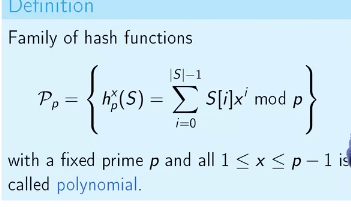

Una vez escogida la x, ya queda fija la hash function. Basicamente, es un polinomio de longitud |S| y con cada coeficiente es S[i] y la variable es el x ya escogido. Tenemos ahora un ejemplo de la implementacion de este hash para una palabra de longitud 3. Lo bueno de definirlo como un polinomio es que se puede ir calculando por medio de sufijos de S iterando como se muestra en la imagen

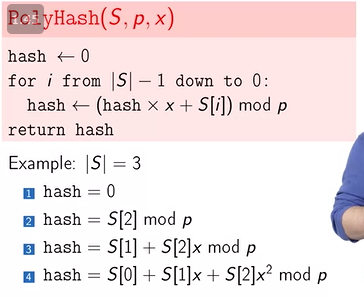

##### Search patterns in text

El hash definido arriba es util para encontrar patrones en texto. <br>
Digamos que nos dan un string T muy largo y un string P (patron). Y queremos encontrar todas las posiciones en el texto T tales que T[i:i+|P|-1] = P. Es decir, todas las veces que aparece el patron P en el texto T <br>  <br>

Naive: Vamos recorriendo todas las posiciones del texto T y vemos si cada substring de tamano |P| es igual a P. El problema, es que la comparacion para ver si el substring es igual a P toma un tiempo |P| y recorrer el texto toma un tiempo |T|, por lo que el algoritmo es de tiempo O(|P||T|). Podria ser especialemnte malo si T = aaaaa...aa y P = aaaaaaaap, porque en este caso, el codigo tiene que hacer la maxima cantidad de comparaciones. <br> 

###### Rabin-Karp:
La idea es usar hashes. Pues sabemos que si los hashes para dos str son distintos entonces los strings son distintos. Si los hashes son iguales, no sabemos del todo si los str son iguales o no, por lo que hay que comparar a mano ahora s'i. El algoritmo sería algo así
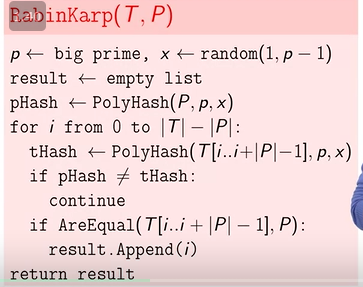
Por ahora tiene un tiempo relativamente largo porque hay que aplicar el hash para cada substring de T y aplicar dicho hash toma un tiempo de aprox |P| (porque hay que hacer un polinomio de orden |P|). 

$\textbf{Propiedad de la Hash function:}$ Una propiedad muy importante de la hash function es que se comporta bien al ir recorriendo el texto T en substrings de longitud |P| en direccion contraria. <br>
dentoamos H[i] = h(T[i: i+|P| -1]) el valor de aplicar la hash al substring de T de longitud |P| que empieza en i. <br>
Vemos el siguiente ejemplo de un texto T (codificado a 01213 en numeros). Vemos que para calcular H[i-1] podemos usar H[i] 
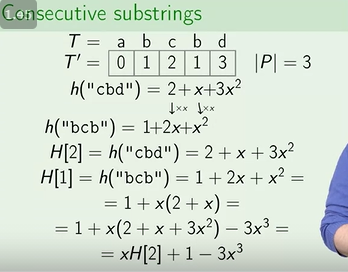

En general, la propiedad es la siguiente para calcular hashes de substrings de T:
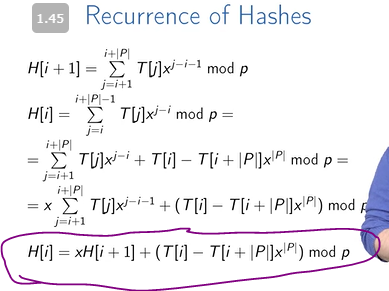

Entonces, podemos precomtuar todos los hashes de |P|-substrings de T y guardarlos en un array H como sigue:
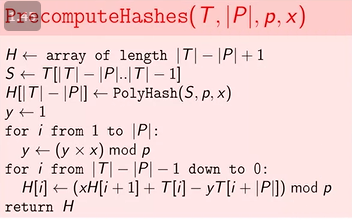
Esto toma un tiempo O(|T| + |P|). <br>
Entonces, precomputando esto, el algoritmo de rabin karp es mucho mas rapido, pues ahora ya tenemos todos los |P|-substrings de T precomputados. Entonces, vamos viendo todos estos hashes y los comparamos con el hash h(P) y s\'olo nos detenemos si los hashes son iguales.


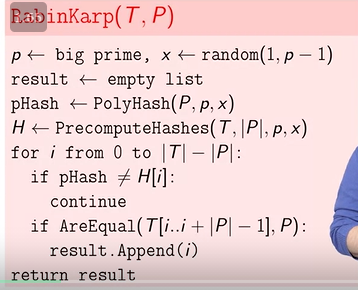
El tiempo es: <br>
1) calculamos h(P) que toma O(|P|) <br>
2) Precalculamos los hashes: O(|T| + |P|) <br>
3) Vamos recorriendo los hashes y vemos si son iguales al hash de P. Si q es la cantidad de veces que P est'a en T, tendremos q veces en que el hash de T es igual al de P (si las colisiones son muy poco probeblaes), por lo que hacer estas q comparaciones nos toma un tiempo O((q+1)|P|). <br>
Entonces, el tiempo total es aprox O(|T| + (q+1)|P|)

#### 1. Phone Book

Buscamos un algoritmo que permita agregar numeros con su respectivo nombre a la lista, que permita borrar un numero y que permita encontrar un numero dado el nombre de la persona

In [2]:
''' Phone Book '''
#Implementar un manager de numeros de telefono. Debe poder agregar un numero
#junto con el nombre (si ya existe un numero, deber reescribir el nombre)
# Debe de poder borrar un numero y debe de poder encontrar el nombre correspondiente a un numero
#Input: N seguido por N instrucciones
#Print el resultado de cada find (nombre o not found)
# Los numeros N son entre 1 y 10^5
#Por eso, usar'e un algoritmo de direct adressin (un array con todos los posibles numeros)
#add 213423 john   del 13242134 find 12341234


N = int(input())
query = []
'''query guarda los pedidods'''
for i in range(N):
    query.append(input().split())

'''creamos una lista con todos los posibles numeros, donde cada uno guardara
el nombre de su dueno'''
nums = 10000000*["null"]
for quer in query:
    #quer es cada pedido
    # Si el pedido tiene tres palabras, es del tipo add 3412412 nombre
    if len(quer) == 3:
        nums[int(quer[1])] = str(quer[2])
    #SINO, es del tipo find o tipo del
    else:
        #Si es del tipo find, imprimimos el nombre guardado
        if quer[0] == "find":
            #Si no hay nada guardado,  (espero nadie se llame null)
            if nums[int(quer[1])] == "null":
                print("not found")
            #Si hay algo guardado, lo imprime   
            else:
                print(nums[int(quer[1])])
        else:
            nums[int(quer[1])] = "null"
    
            
            
#esto usa mucha memoria y ni usa hash pero 

8
find 654654
add 123456 me
add 0 granny
find 0
find 123456
del 0
del 0
fin 0
not found
granny
me


 #### 2. Hashing con cadenas

Vamos a usar el algoritmo de hash para un string 
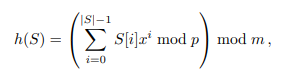
Donde S[i] es el codigo ASCII del i-esimo caracter de S, p = 1000000007, x =263. El programa debe de ser capaz de resolver: <br> 
1. add string: Inserta el string a la hash table (si no fue asignada antes) <br>
2. del string: elimina el string de la hash table <br>
3. find string: dice si o no dependiendo de si el str esta o no <br>
4. check i: Outputeamos los elementos en la hash table que est'an en i. <br>  <br>

Input: un entero m en la primera linea (la cantidad de espacios en la hash table). Luego un numero N y Luego N queries. <br>
Output: imprimimos los resultados de find y de check. 

In [4]:
m = int(input())
N = int(input())
query = []
'''query guarda los pedidos'''
for i in range(N):
    query.append(input().split())

#Crea las m cadenas (vacias)
bucket = [[] for i in range (m)]
# Es la hash table de los resultados.

def hash_func (s):
    '''Operacion de hash que me dieron (La de polinomios y eso)'''
    ans = 0
    for c in reversed(s):
        ans = (ans * 263 + ord(c)) % 1000000007
    return ans % m
    # es la forma de calcular el hash para un string S.
    #ord es el ASCII de c

def add(st):
    ''' agrega st a la hash table'''
    # le aplicamos la hash a la palabra st
    cad = hash_func(st)
    # entre los elementos que han sido hasheados a cad en la hash table
    # vemos si st ya estaba guardado, en cuyo caso no hacemos nada para no 
    #duplicar
    
    for i in range(len(bucket[cad])):
        if st == bucket[cad][i]:
            return
    #si no estaba anadido, agregamos st a esta 
    # cadena de la hash table al inicio de la cadena
    bucket[cad].insert(0,st)

def dele(st):
    ''' borra el str st de la tabla (si est'a)'''
    # calculamos el hash del st
    cad = hash_func(st)
    # Nos fijamos en la cadena de la hash table correspondiente
    for i in range(len(bucket[cad])):
        # si el st esta en la cadena, lo poppeamos
        if st == bucket[cad][i]:
            bucket[cad].pop(i)
            break

def find(st):
    ''' Vemos si un str est'a o no en la hash table '''
    #calculamos su hash
    cad = hash_func(st)
    
    # buscamos en la cadena correspondiente
    for i in range(len(bucket[cad])):
        # si el st est'a en la cadena, regresamos si
        if st == bucket[cad][i]:
            return ("yes")
    #sino , ponemos no
    return("no")

def check(i):
    ''' Outputea la cadena i de la hash table'''
    # si la cadena es vacia imprimimos una linea vacia
    if len(bucket[i]) == 0:
        print("")
    #sino, imprimios la linea
    else:
        print(*bucket[i])

#Aplicamos cada quer
for quer in query:
    if quer[0] == "add":
        add(quer[1])
    elif quer[0] == "del":
        dele(quer[1])
    elif quer[0] == "find":
        print(find(quer[1]))
    elif quer[0] == "check":
        check(int(quer[1]))
#print(bucket)


4
8
add test
add test
find test
del test
find test
find Test
add Test
find Test
yes
no
no
yes


#### 3. Find pattern in a text

Aplicar Rabin-Karp. Nos dan un texto T y un patron P y hay que outputear las partes del texto en las que aparece P

In [5]:
#Rabin Karps algorithm
#Input: un patron
#P y un string T
#Outpu: lugares en T en los que aparece P
from time import time

P = input()
T = input()
primo = 1000000007

x = 263


#Hash con x = 263, p = 1000000007 
def hash_fun(s):
    ans = 0
    for c in reversed(s):
        ans = (ans * x + ord(c)) % primo
    return ans


k=len(P)
m=len(T)

#Calculamos el hash del patron
#y tambien el hash de la ultima parte del texto (la ultima parte de long k) 
hashp = hash_fun(P)
lasthash = hash_fun(T[m-k:m])

#Aqui pondremos los resultados
res=[]
y=1
for i in range(1,k+1):
        y = (y*x) % primo

for i in range(m-k,-1,-1):
    #Checamos si el hash de una parte de T coincide con el hash de P
    #De ser as'i, es posible que esta parte sea igual a P, por eso lo checamos
    if lasthash == hashp:
        if T[i:i+k] == P:
            res.append(i)
    #Calculamos el hash de la parte anterior del texto T.
    #Se puede calcular sin hacer todo el hash de nuevo, por cierta propiedad del hash.
    lasthash = (lasthash * x + (ord(T[i-1]) - ord(T[i+k-1])*y)) % primo
    #print(lasthash)

print(*reversed(res))

aaaaa
baaaaaaaaa
1 2 3 4 5


#### 4. Igualdad de Substrings <br>

Input: Nos dan un string s. Y luego nos dan el numero q de queries. Las siguientes q lineas especifican  las queries usando tres numeros. <br>
Para cada query de la forma a b l, outputemaos "yes" si s_a s_{a+1} ... s_{a+l-1} = s_b s_{b+1} ... s_{b+l-1}. <br>
Es decir, hay que ver si los dos substrings de longitud l que empiezan en a y en b son iguales. 

In [6]:
#Las preguntas son del tipo 2 4 3, lo que significa si los strings desde 2 y
#desde 4 con longitud 3 son iguales.

import sys

S = input()
lens = len(S)
#numero de queries
q = int(input())
x=267
primo1 = 10**9 + 7
primo2 = 10**9 + 9

#Definimos asi una hash func polinomial
#Hash(s) = s_0 x^(m-1) + s_1 x^(m-2) + ... + t_{m-2} x + t_{m-1}
def hash_fun(s):
    ans = 0
    for c in reversed(s):
        ans = (ans * x + ord(c)) % primo1
    return ans
    #aplicamos la hashfun

#Podemos calcular el hash de cualquir substring como sigue (usando solo prefijos)
#H(s_a s_{a+1} ... s_{a+L-1}) = H(s_0 s_1.... s_{a+L-1}) - x^L H(s_0s_1...s_{a-1})
#Precomputamos el hash de todos los posibles prefijos.


#calculare los hashes de todos los substrings pero usando dos primos distintos
#asi tendremos dos formas de comparar los strings.
h1=(lens+1)*[0]
h2=(lens+1)*[0]
for i in range(1,lens+1):
    h1[i] = (x*h1[i-1] + ord(S[i-1])) % primo1
for i in range(1,lens+1):
    h2[i] = (x*h2[i-1] + ord(S[i-1])) % primo2

#h1[i] contiene el prefijo hasta i-1 con mod primo1
#h2[i] contiene los prefijos pero con mod primo2 (para tener dos hashes)


#Potencias
#calculamos x^Lon haciendo mods a cada rato
y1 = 1
y2 = 1
y1list = []
y2list = []
for i in range(lens):
    y1 = (y1 * x) % primo1
    y2 = (y2 * x) % primo2
    y1list.append(y1)
    y2list.append(y2)
    

res=[]
for k in range(q):
    a , b , lon = [int(x) for x in input().split()]
    

    #y1 = x**lon % primo1
    #y2 = x**lon % primo2
    #Calculamos los dos hash de los dos pedazos usando las formulitas
    Ha1 = (h1[a+lon] - y1list[lon-1]* h1[a]) %primo1
    Hb1 = (h1[b+lon] - y1list[lon-1]* h1[b]) %primo1
    Ha2 = (h2[a+lon] - y2list[lon-1]* h2[a]) %primo2
    Hb2 = (h2[b+lon] - y2list[lon-1]* h2[b]) %primo2

    #print(Ha1)
    #print(Ha2)
    if Ha1 != Hb1:
        res.append("No")
        continue

    

    if Ha2 != Hb2:
        res.append("No")
        continue
    else:
        res.append("Yes")

for i in res:
    print(i)

trololo
4
0 0 7
2 4 3
3 5 1
1 3 2
Yes
Yes
Yes
No


#### Longest Common Substring
Cada linea del input contiene dos strings. Luego, debemos encontrar la subsecuencia (de elementos seguidos) mas larga que es igual en las dos palabras. Imprimimos el indice i de la primera palabra y el indice j de la segunda junto con la longitud de la cadena compartida

In [8]:
'''Longest Common substring'''
'''Encontrar el LCS entre dos strings
y decir donde empieza el substring en cada string y su longitud'''

#input: Cada linea de input tiene dos palabras
#Regresar 3 numeros (donde empieza el primer y segundo y la longitud.
import sys
import bisect
from math import *
from time import time

#cosas es el resultado de los hashes, lo cre'e para guardar el indice de cada hash
class cosas:
    def __init__(self,val,ind):
        self.val=val
        self.ind=ind
    #El __It__ le dice a bisect con respecto a que attributo buscar
    def __lt__(self,other):
        return self.val < other.val

def binary_search_ind(Alist, lon, obj):
    #limites left / right
    L = 0
    R = lon-1
    while L <= R:
        #punto medio
        m = floor((L+R)/2)
        if Alist[m].val < obj:
            L = m+1
        elif Alist[m].val > obj:
            R = m-1
        else:
            
            return(Alist[m].ind)
    return(-1)


            
    

x=5
primo1 = 10**9 + 7
primo2 = 10**11 + 7
'''
def hash_fun(s):
    ans = 0
    for c in reversed(s):
        ans = (ans * x + ord(c)) % primo1
    return ans
'''
def Hash_substr(S):
    lens=len(S)
    #h1[i] guarda el hash de los primeros i characters de s , con el hash 1
    #h2[i] guarda el hash de los primeros i characters de s , con el hash 2

    #h1=(lens+1)*[0]
    h2=(lens+1)*[0]
    #for i in range(1,lens+1):
        #h1[i] = (x*h1[i-1] + ord(S[i-1])) % primo1
    for i in range(1,lens+1):
        h2[i] = (x*h2[i-1] + ord(S[i-1])) % primo2

    #return(h1,h2)
    return(h2)

    #Regresa una lista de x**lon % primo1 para toda posible lon
#y1 = 1
st=time()
y2 = 1
#y1list = []
y2list = []
for i in range(100000):
    #y1 = (y1 * x) % primo1
    y2 = (y2 * x) % primo2
    #y1list.append(y1)
    y2list.append(y2)

#def hash_substr_lonk(S,k,i,h1,h2):
def hash_substr_lonk(S,k,i,h2):
    #Devuelve el hash de longitud k e inicio en i del str S
    #Ha1 = (h1[i+k] - y1list[k-1]* h1[i]) %primo1

    Ha2 = (h2[i+k] - y2list[k-1]* h2[i]) %primo2
    #return(Ha1,Ha2)
    return(Ha2)

def solve(s,t):
    
    #h1 = Hash_substr(s)[0]
    #h2 = Hash_substr(s)[1]
    h2 = Hash_substr(s)
    t2 = Hash_substr(t)
    lens = len(s)
    lent = len(t)
    #hashces de s1[k][i] da el hash de longitud k+1 que empieza en i con primo 1
    #el otro es con primo 2
    #Asi, tenemos todos los posibles hashes de s1

    #hashes_de_s1= [[]for i in range(lens)]
    #hashes_de_s2= [[]for i in range(lens)]

    
    for k in range(lens,0,-1):
        hashes_de_s1y2k = []
        st = time()
        for i in range(lens-k+1):
            #res = hash_substr_lonk(s,k,i,h1,h2)
            #hashes_de_s1[k-1].append(res[0])
            #hashes_de_s2[k-1].append(res[1])
            
            #hashes_de_s1y2[k-1].append(hash_substr_lonk(s,k,i,h1,h2))
            bisect.insort_left(hashes_de_s1y2k, cosas(hash_substr_lonk(s,k,i,h2),i)) 
            
            #hashes_de_s1y2k.append(cosas(hash_substr_lonk(s,k,i,h2),i))

        #t1 y t2 son los hashes de substrings de t
        #t1 = Hash_substr(t)[0]
        #t2 = Hash_substr(t)[1]
        #print([f.val for f in hashes_de_s1y2k])
        

        for i in range(lent-k+1):
            #res = hash_substr_lonk(t,k,i,t1,t2)
            res = hash_substr_lonk(t,k,i,t2)
            
            j = binary_search_ind(hashes_de_s1y2k,lens-k+1, res)
            if j != -1:
                return([j,i,k])
            
            '''
            for j in range(lens-k+1):
                if res == hashes_de_s1y2k[j]:
                    return([j,i,k])
            '''
    return([0,0,0])

             
        
    
            
            



'''

for i in range(3):
    s , t = input().split()
    print(*solve(s,t))
'''
    
for line in sys.stdin.readlines():
    s, t = line.split()
    ans = solve(s, t)
    print(*ans)